# EQUIVALENCE CLASS:
A stimulus class (usually produced through conditional discrimination in matching-to-sample) that includes all possible emergent relations among its members. The properties of an equivalence class are derived from the logical relations of reflexivity, symmetry, and transitivity. **Reflexivity** *refers to the matching of a sample to itself*, sometimes called identity matching (AA, BB, CC, in these examples, each letter pair represents a sample and its matching comparison stimulus). **Symmetry** *refers to the reversibility of a relation (if AB, then BA)*. **Transitivity** *refers to the transfer of the relation to new combinations through shared membership (if AB and BC, then AC)*. 
If these properties are characteristics of a matching to-sample performance, then training AB and BC may produce AC, BA, CA, and CB as emergent relations (reflexivity provides the three other possible relations, AA, BB, and CC). Given AB and BC, for example, the combination of symmetry and transitivity implies the CA relation. The emergence of all possible stimulus relations after only AB and BC are trained through contingencies is the criterion for calling the three stimuli members of an equivalence class. The class can be extended by training new stimulus relations (e.g., if CD is learned, then AD, DA, BD, DB, and DC may be created as emergent relations). Stimuli that are members of an equivalence class are likely also to be functionally equivalent. It remains to be seen whether the logical properties of these classes are fully consistent with their behavioral ones. Cf. ** EQUIVALENCE RELATION**. ([source](http://www.scienceofbehavior.com/lms/mod/glossary/view.php?id=408&mode=letter&hook=E&sortkey=CREATION&sortorder=asc&fullsearch=0&page=3))
([Video](https://www.youtube.com/watch?v=En2OgGOICbA))


# Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import average_precision_score

%matplotlib inline
plt.style.use('seaborn')

In [26]:
import sys
print("Python", sys.version)
import sklearn
print("Scikit-learn",sklearn.__version__)

Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
Scikit-learn 0.22.1


In [27]:
!conda info


     active environment : sociadisticas
    active env location : C:\Users\Usuario\.conda\envs\sociadisticas
            shell level : 2
       user config file : C:\Users\Usuario\.condarc
 populated config files : C:\Users\Usuario\.condarc
          conda version : 4.8.3
    conda-build version : 3.18.11
         python version : 3.7.7.final.0
       virtual packages : 
       base environment : C:\ProgramData\Anaconda3  (writable)
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
          package cache : C:\ProgramData\Anaconda3\pkgs
                          C:\Users\Usuario\.conda\pkgs
                          C:\Users\Usuari

In [2]:
def view_trial(trial_labels,trial_values,trial_ans, n_trial, n_stimuli=6, n_classes=3, n_modes=6):
    print (n_trial,len(trial_labels))
    print (np.array(trial_values[n_trial]).reshape((n_stimuli,n_classes,n_modes)))
    print (trial_labels[n_trial])
    print (trial_ans[n_trial])

def create_trials(stims,pair):
    #Take a set of stimuli and a set of pairs, then find the mode (letter) of the comparators and combines them.
    filt_tr=[pair[1][0]==stim[0] for stim in stims.keys()]# filter the simulus of the mode of the comparator
    comprs=np.array(list(stims.keys()))[filt_tr] # Get the set of comparators
    comprs_set_1=np.array([[p,q,r,s,t]for p in comprs for q in comprs for r in comprs for s in comprs for t in comprs])# all the combinations of the comparators
    comprs_filt=[(np.sum(cmpr_set==pair[1])==1) for cmpr_set in comprs_set_1]#==1 for the presence of the target comparator ## <2 for target comparator and no answer.
    comprs_set=comprs_set_1[comprs_filt]# filtered set of comparators with the sample presented just once.
    train_labels=np.insert(comprs_set,0, pair[0], axis=1)# train labels with sample and comparators
    train_answers=np.array([(tr_lbl==pair[1])*1 for tr_lbl in comprs_set]) # Encoded answers for the trials. 
    train_values=np.array([[stims[stml]for stml in stmls] for stmls in train_labels])
    train_values=train_values.reshape((train_values.shape[0],(train_values.shape[1]*train_values.shape[2])))# create a list of the encoded values of the trial
    return train_labels,train_values,train_answers

def create_set(trials_pairs, stims):
    trialset=[create_trials(stims,pair) for pair in trials_pairs]
    labels=np.array([tr_lb for tr_pr in trialset for tr_lb in tr_pr[0]])
    values=np.array([tr_lb for tr_pr in trialset for tr_lb in tr_pr[1]])
    answer=np.array([tr_lb for tr_pr in trialset for tr_lb in tr_pr[2]])
    return labels,values,answer

In [3]:
stims={"A1":[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
       "A2":[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
       "A3":[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
       "A4":[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
       "A5":[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
       "A6":[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
       "B1":[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
       "B2":[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
       "B3":[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
       "B4":[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
       "B5":[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
       "B6":[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
       "C1":[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
       "C2":[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
       "C3":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
       "C4":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
       "C5":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
       "C6":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
      }

options={"O_1":[1,0,0,0,0],
         "O_2":[0,1,0,0,0],
         "O_3":[0,0,1,0,0],
         "O_4":[0,0,0,1,0],
         "O_5":[0,0,0,0,1],
         "O_0":[0,0,0,0,0],
        }


## Clasifiers

In [4]:
h = .02  # step size in the mesh

names = [
    "Nearest Neighbors", 
    "Linear SVM", 
    "RBF SVM", 
#    "Gaussian Process",
    "Decision Tree", 
    "Random Forest", 
    "Neural Net", 
    "AdaBoost",
    "Naive Bayes", 
    "QDA"
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

# Trainning 
### Relation $A_{n}-B_{n}$ and $B_{n}-C_{n}$

In [5]:
train_pairs=np.array([["A1","B1"],["B1","C1"],
                      ["A2","B2"],["B2","C2"],
                      ["A3","B3"],["B3","C3"],
                      ["A4","B4"],["B4","C4"],
                      ["A5","B5"],["B5","C5"],
                      ["A6","B6"],["B6","C6"]
                     ])

In [6]:
train_labels,train_values,train_answer=create_set(train_pairs, stims)

In [7]:
view_trial(train_labels,train_values,train_answer,random.randrange(len(train_labels)))

22408 37500
[[[0 0 0 0 0 0]
  [0 0 0 1 0 0]
  [0 0 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 1 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [1 0 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 1 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [1 0 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 1 0]]]
['B4' 'C2' 'C1' 'C4' 'C1' 'C5']
[0 0 1 0 0]


### Full Dataset Trainning

In [8]:
avg_scores_train=[]
train_clasif=[]
for name, clf in zip(names, classifiers):
    clasif=OneVsRestClassifier(clf).fit(train_values, train_answer)
    train_clasif.append(clasif)
    scr=average_precision_score(train_answer,clasif.predict(train_values))
    avg_scores_train.append(scr)
    print(name,scr)

Nearest Neighbors 0.97568
Linear SVM 0.2
RBF SVM 1.0
Decision Tree 0.2667462686567164
Random Forest 0.2
Neural Net 1.0
AdaBoost 0.2
Naive Bayes 0.2


C:\Users\Usuario\.conda\envs\sociadisticas\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Usuario\.conda\envs\sociadisticas\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Usuario\.conda\envs\sociadisticas\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Usuario\.conda\envs\sociadisticas\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Usuario\.conda\envs\sociadisticas\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA 0.926848


In [9]:
train_clasif

[OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=3,
                                                    p=2, weights='uniform'),
                     n_jobs=None),
 OneVsRestClassifier(estimator=SVC(C=0.025, break_ties=False, cache_size=200,
                                   class_weight=None, coef0=0.0,
                                   decision_function_shape='ovr', degree=3,
                                   gamma='scale', kernel='linear', max_iter=-1,
                                   probability=False, random_state=None,
                                   shrinking=True, tol=0.001, verbose=False),
                     n_jobs=None),
 OneVsRestClassifier(estimator=SVC(C=1, bre

# Reflexivity evaluation

### Given the sample stimulus $A_{n}$ the agent must select $A_{n}$ among the comparator stimuli

In [10]:
reflexiv_pairs=np.array([[stm,stm]for stm in stims])
reflexivity_labels, reflexivity_values, reflexivity_answer =create_set(reflexiv_pairs, stims)

In [11]:
view_trial(reflexivity_labels,reflexivity_values,reflexivity_answer,random.randrange(len(reflexivity_labels)))

55739 56250
[[[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 1]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 1]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [1 0 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 1 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 1 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 1 0]]]
['C6' 'C6' 'C1' 'C5' 'C3' 'C5']
[1 0 0 0 0]


In [12]:
avg_scores_reflexivity=[]
for name, clasif in zip(names, train_clasif):
    scr=average_precision_score(reflexivity_answer,clasif.predict(reflexivity_values))
    avg_scores_reflexivity.append(scr)
    print(name,scr)

Nearest Neighbors 0.21340370835695657
Linear SVM 0.2
RBF SVM 0.2
Decision Tree 0.20079012345679015
Random Forest 0.2
Neural Net 0.2
AdaBoost 0.2
Naive Bayes 0.2
QDA 0.19797388538642435


# Symmetry evaluation
### Given the trainning pairs, the agent must select the comparator $A_{n}$ in presence of the sample $B_{n}$  and the comparator $B_{n}$ in presence of the sample $C_{n}$ 

In [13]:
symmetry_pairs=np.array([[tr_pr[1],tr_pr[0]]for tr_pr in train_pairs])
symmetry_labels, symmetry_values, symmetry_answer =create_set(symmetry_pairs, stims)

In [14]:
view_trial(symmetry_labels,symmetry_values,symmetry_answer,random.randrange(len(symmetry_labels)))

22051 37500
[[[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 1 0 0]]

 [[0 0 0 0 0 0]
  [1 0 0 0 0 0]
  [0 0 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 1 0 0 0]
  [0 0 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 1 0 0 0]
  [0 0 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 1 0 0]
  [0 0 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 1 0]
  [0 0 0 0 0 0]]]
['C4' 'B1' 'B3' 'B3' 'B4' 'B5']
[0 0 0 1 0]


In [15]:
avg_scores_symmetry=[]
for name, clasif in zip(names, train_clasif):
    scr=average_precision_score(symmetry_answer,clasif.predict(symmetry_values))
    avg_scores_symmetry.append(scr)
    print(name,scr)

Nearest Neighbors 0.20739694020879945
Linear SVM 0.2
RBF SVM 0.2
Decision Tree 0.20094814814814818
Random Forest 0.2
Neural Net 0.2
AdaBoost 0.2
Naive Bayes 0.2
QDA 0.20034108834358588


# Transitivity
### Given the trainning pairs, the agent must select the comparator $C_{n}$ in presence of the sample $A_{n}$

In [16]:
transitivity_pairs=np.array([["A1","C1"],
                             ["A2","C2"],
                             ["A3","C3"],
                             ["A4","C4"],
                             ["A5","C5"],
                             ["A6","C6"]
                            ])

In [17]:
transitivity_labels, transitivity_values, transitivity_answer =create_set(transitivity_pairs, stims)

In [18]:
view_trial(transitivity_labels,transitivity_values,transitivity_answer,random.randrange(len(transitivity_labels)))

9319 18750
[[[0 0 1 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 1]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 1]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 1 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 1]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 1 0 0 0]]]
['A3' 'C6' 'C6' 'C2' 'C6' 'C3']
[0 0 0 0 1]


In [19]:
avg_scores_transitivity=[]
for name, clasif in zip(names, train_clasif):
    scr=average_precision_score(transitivity_answer,clasif.predict(transitivity_values))
    avg_scores_transitivity.append(scr)
    print(name,scr)

Nearest Neighbors 0.23132766317527748
Linear SVM 0.2
RBF SVM 0.2
Decision Tree 0.20047407407407408
Random Forest 0.2
Neural Net 0.2
AdaBoost 0.2
Naive Bayes 0.2
QDA 0.2


# Equivalence
### Given the trainning pairs, the agent must select the comparator $A_{n}$ in presence of the sample $C_{n}$

In [20]:
equivalence_pairs=np.array([[tr_pr[1],tr_pr[0]]for tr_pr in transitivity_pairs])

In [21]:
equivalence_labels, equivalence_values, equivalence_answer =create_set(equivalence_pairs, stims)

In [22]:
view_trial(equivalence_labels,equivalence_values,equivalence_answer,random.randrange(len(equivalence_labels)))

14902 18750
[[[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 1 0]]

 [[0 0 0 0 1 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]

 [[0 0 0 1 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]

 [[0 1 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]

 [[1 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]

 [[0 0 1 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]]
['C5' 'A5' 'A4' 'A2' 'A1' 'A3']
[1 0 0 0 0]


In [23]:
avg_scores_equivalence=[]
for name, clasif in zip(names, train_clasif):
    scr=average_precision_score(equivalence_answer,clasif.predict(equivalence_values))
    avg_scores_equivalence.append(scr)
    print(name,scr)

Nearest Neighbors 0.2
Linear SVM 0.2
RBF SVM 0.2
Decision Tree 0.2
Random Forest 0.2
Neural Net 0.2
AdaBoost 0.2
Naive Bayes 0.2
QDA 0.19755713863927787


# Results

In [24]:
results_df=pd.DataFrame(np.column_stack([avg_scores_train,avg_scores_reflexivity,avg_scores_symmetry,avg_scores_transitivity,avg_scores_equivalence]),index=names, columns=["Train", "Reflexivity", "Symmetry","Transitivity","Equivalence"])
results_df

,Train,Reflexivity,Symmetry,Transitivity,Equivalence
Nearest Neighbors,0.975680,0.213404,0.207397,0.231328,0.200000
Linear SVM,0.200000,0.200000,0.200000,0.200000,0.200000
RBF SVM,1.000000,0.200000,0.200000,0.200000,0.200000
Decision Tree,0.266746,0.200790,0.200948,0.200474,0.200000
Random Forest,0.200000,0.200000,0.200000,0.200000,0.200000
Neural Net,1.000000,0.200000,0.200000,0.200000,0.200000
AdaBoost,0.200000,0.200000,0.200000,0.200000,0.200000
Naive Bayes,0.200000,0.200000,0.200000,0.200000,0.200000
QDA,0.926848,0.197974,0.200341,0.200000,0.197557


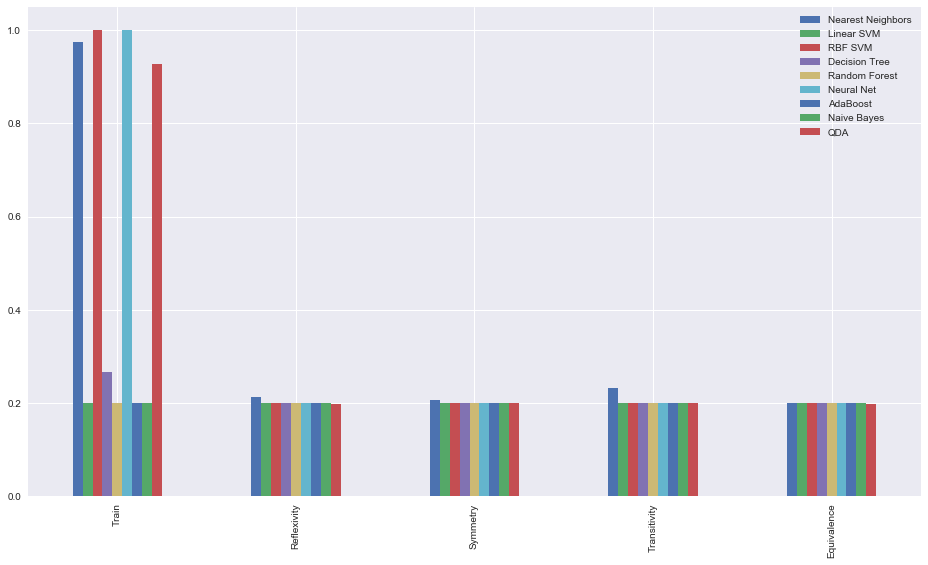

In [28]:
results_df.T.plot(kind="bar", figsize=(16,9))

# Verify performance clasifiers and separate trainning from testing.
There is possible that inside the train trials there are the test trials marked as no response.